In [36]:
!pip install -q pyomo

In [37]:
from pyomo.environ import *

#the mathematical model for exercise 2
$\min\sum_{i=1,j=1}^{i=12,j=12} C_{i,j}*X_{i,j}$\ 

$C_{i,j} $(it is representing a setup cost which is required to set  ith companay at j th location)\
$X_{i,j}$( it is a decision variable )

note:each variable is represented by two indices i& j namely. i ,j takes integer value in [1,12],i is representing factory (each factory is uniqely assigned an integer in range [1,12] )and j is representing the loaction (each location is uniquely assigned an integer value in [1,12]\
\
constraints given below  are representing only one factory of one kind can be setup at any one location out of 12 choices of locations. 
\begin{align}\ 
\sum_{j=1}^{12} x_{1j} = 1
\sum_{j=1}^{12} x_{2j} =1 
\sum_{j=1}^{12} x_{3j} =1
\sum_{j=1}^{12} x_{4j} =1 
\sum_{j=1}^{12} x_{5j} =1 
\sum_{j=1}^{12} x_{6j} =1 
\sum_{j=1}^{12} x_{7j} =1  
\sum_{j=1}^{12} x_{8j} =1 
\sum_{j=1}^{12} x_{9j} =1 
\sum_{j=1}^{12} x_{10j} =1 
\sum_{j=1}^{12} x_{11j} =1  
\sum_{j=1}^{12} x_{12j} =1 
\end{align}
below are the constraints which is indicating that each loaction can only have one factory out of 12  factories.
\begin{align}\
\sum_{i=1}^{12} x_{i1} = 1
\sum_{i=1}^{12} x_{i2} =1 
\sum_{i=1}^{12} x_{i3} =1
\sum_{i=1}^{12} x_{i4} =1 
\sum_{i=1}^{12} x_{i5} =1 
\sum_{i=1}^{12} x_{i6} =1 
\sum_{i=1}^{12} x_{i7} =1  
\sum_{i=1}^{12} x_{i8} =1 
\sum_{i=1}^{12} x_{i9} =1 
\sum_{i=1}^{12} x_{i10} =1 
\sum_{i=1}^{12} x_{i11} =1  
\sum_{i=1}^{12} x_{i12} =1 
\end{align}

In [38]:
import numpy as np

In [39]:
cost=np.loadtxt('lab5_ex2.txt',delimiter=' ')

In [40]:
print(cost.shape[0])

12


In [41]:
print(cost.shape[1])

12


In [42]:
model_lab5=ConcreteModel()

In [43]:
print(cost)

[[19. 12. 18. 19. 22. 21. 17. 20. 16. 15. 21. 24.]
 [22. 22. 19. 21. 22. 24. 18. 17. 21. 19. 22. 23.]
 [18. 23. 20. 20. 21. 22. 19. 18. 20. 23. 19. 19.]
 [18. 21. 20. 18. 17. 19. 24. 16. 18. 16. 20. 24.]
 [23. 17. 16. 19. 24. 21. 23. 21. 20. 21. 22. 21.]
 [23. 20. 17. 16. 20. 23. 22. 25. 24. 19. 17. 20.]
 [22. 18. 17. 15. 22. 24. 23. 20. 22. 19. 23. 20.]
 [24. 22. 21. 23. 18. 17. 16. 19. 24. 21. 20. 23.]
 [21. 20. 17. 18. 16. 24. 19. 17. 18. 20. 21. 23.]
 [19. 22. 21. 24. 20. 23. 19. 18. 23. 24. 25. 20.]
 [20. 24. 22. 20. 23. 19. 18. 16. 22. 24. 21. 24.]
 [22. 23. 24. 20. 21. 20. 20. 19. 17. 19. 20. 22.]]


In [44]:
#declaring N  a python variable which is representing different  location at which factory can be setup
N=cost.shape[1]
#declaring M  a python variable which is representing different factories
M=cost.shape[0] 

In [45]:
row_indices=range(N)
col_indices=range(M)

In [46]:
model_lab5.constraints=ConstraintList()

In [47]:
#declaring model variables.
model_lab5.x=Var(row_indices,col_indices,domain=Binary)

In [48]:
#defining objective function
model_lab5.objective=Objective(expr=summation(cost,model_lab5.x),sense=minimize)

In [49]:
#defining constraints that n different  factory has to be setup one at each of the n location
for i in row_indices:
  model_lab5.constraints.add(expr=sum(model_lab5.x[i,j] for j in col_indices)==1)


In [50]:
#defining constraints that each location must have a factory from n different factories
for j in col_indices:
  model_lab5.constraints.add(expr=sum(model_lab5.x[i,j] for i in row_indices)==1)

In [51]:
model_lab5.pprint()

4 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain              : Size : Members
        None :     2 : x_index_0*x_index_1 :  144 : {(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 1

In [52]:
!apt-get install -y -qq coinor-cbc

In [53]:
opt_cbc = SolverFactory('cbc')

In [54]:
result = opt_cbc.solve(model_lab5)



In [55]:
print('Solver status:', result.solver.status)
print('Solver termination condition:',result.solver.termination_condition)

Solver status: ok
Solver termination condition: optimal


#8[R]
Reporting optimum value of objective function,and decision variables which are non zero.

In [56]:
# display solution
print('\nObjective = ', model_lab5.objective())
print("\n descision variables")
for i in row_indices:
  for j in col_indices:
    if model_lab5.x[i,j].value!=0:
        print('lacation','[',j+1,']','is choosen for factory','[',i+1,']',':',model_lab5.x[i,j].value)
model_lab5.constraints.display()


Objective =  198.0

 descision variables
lacation [ 2 ] is choosen for factory [ 1 ] : 1.0
lacation [ 7 ] is choosen for factory [ 2 ] : 1.0
lacation [ 12 ] is choosen for factory [ 3 ] : 1.0
lacation [ 10 ] is choosen for factory [ 4 ] : 1.0
lacation [ 3 ] is choosen for factory [ 5 ] : 1.0
lacation [ 11 ] is choosen for factory [ 6 ] : 1.0
lacation [ 4 ] is choosen for factory [ 7 ] : 1.0
lacation [ 6 ] is choosen for factory [ 8 ] : 1.0
lacation [ 5 ] is choosen for factory [ 9 ] : 1.0
lacation [ 1 ] is choosen for factory [ 10 ] : 1.0
lacation [ 8 ] is choosen for factory [ 11 ] : 1.0
lacation [ 9 ] is choosen for factory [ 12 ] : 1.0
constraints : Size=24
    Key : Lower : Body : Upper
      1 :   1.0 :  1.0 :   1.0
      2 :   1.0 :  1.0 :   1.0
      3 :   1.0 :  1.0 :   1.0
      4 :   1.0 :  1.0 :   1.0
      5 :   1.0 :  1.0 :   1.0
      6 :   1.0 :  1.0 :   1.0
      7 :   1.0 :  1.0 :   1.0
      8 :   1.0 :  1.0 :   1.0
      9 :   1.0 :  1.0 :   1.0
     10 :   1.0 :  1

#9[R]
solving above problem using non negative continous variable.

In [57]:
model_lab5.x.domain=NonNegativeReals

In [58]:
model_lab5.pprint()

4 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   24 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain              : Size : Members
        None :     2 : x_index_0*x_index_1 :  144 : {(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 1

In [59]:
result = opt_cbc.solve(model_lab5)

In [60]:
print('Solver status:', result.solver.status)
print('Solver termination condition:',result.solver.termination_condition)

Solver status: ok
Solver termination condition: optimal


In [61]:
# display solution
print('\nObjective = ', model_lab5.objective())
print("\n descision variables")
for i in row_indices:
  for j in col_indices:
    if model_lab5.x[i,j].value!=0:
        print('lacation','[',j+1,']','is choosen for factory','[',i+1,']',':',model_lab5.x[i,j].value)
model_lab5.constraints.display()


Objective =  198.0

 descision variables
lacation [ 2 ] is choosen for factory [ 1 ] : 1.0
lacation [ 7 ] is choosen for factory [ 2 ] : 1.0
lacation [ 12 ] is choosen for factory [ 3 ] : 1.0
lacation [ 10 ] is choosen for factory [ 4 ] : 1.0
lacation [ 3 ] is choosen for factory [ 5 ] : 1.0
lacation [ 11 ] is choosen for factory [ 6 ] : 1.0
lacation [ 4 ] is choosen for factory [ 7 ] : 1.0
lacation [ 6 ] is choosen for factory [ 8 ] : 1.0
lacation [ 5 ] is choosen for factory [ 9 ] : 1.0
lacation [ 1 ] is choosen for factory [ 10 ] : 1.0
lacation [ 8 ] is choosen for factory [ 11 ] : 1.0
lacation [ 9 ] is choosen for factory [ 12 ] : 1.0
constraints : Size=24
    Key : Lower : Body : Upper
      1 :   1.0 :  1.0 :   1.0
      2 :   1.0 :  1.0 :   1.0
      3 :   1.0 :  1.0 :   1.0
      4 :   1.0 :  1.0 :   1.0
      5 :   1.0 :  1.0 :   1.0
      6 :   1.0 :  1.0 :   1.0
      7 :   1.0 :  1.0 :   1.0
      8 :   1.0 :  1.0 :   1.0
      9 :   1.0 :  1.0 :   1.0
     10 :   1.0 :  1

#10[R]
yes the optimal cost for both cases ( Integer and Real variables)are same. Also the decision variables are taking integer values in both case.in case of integer variables taking integer value is ok. but in case of non negative reals ,variables taking integer value is a point to justify.\
since this is an assignment problem where our goal is to minimise the cost , lets say in a row i got  a point/cell which is having low setupcost so , my objective will be to assign the maximum allowed capacity(here maximum value is 1 factory ) in that cell only so to spend minimum amount forsetting a factory. 
similarly we will see other rows which must satisfy the constraints at the same time ,also minimises the cost.while finding minimum setup cost in a row ,we must also satisfy the constraints column wise.
sometime we will see that in a row ,assignemnt is done at location where relatively higher setup cost is there comapred to other entries in the row,this is because the algorithm aim is not to minimise row wise cost but objective is to minimize overall cost.
below is the picture depicting assigned point to setup factory is highlited.
one can observer while going from the first row why in case of real variables have taken nonnegativeinteger.X[1,2] has minimum cost in the first row so assigned full allowable value of X i.e 1.
same logic applies to everyrow,keeping in mind to minimise overall cost. 


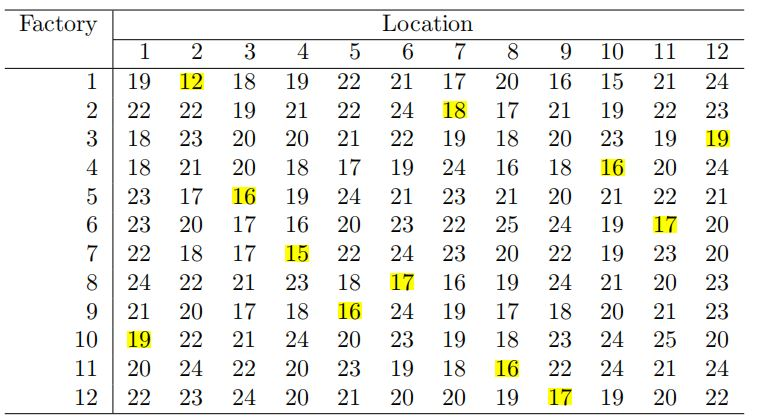

#12[R]
here to solve the problem with some additional constraints. \
$X[1,4]=0\\X[11,3]=0\\X[5,9]=0 $\
#
we can also solve this problem by making entry in the txt file .Since X[1,4] ,X[11,3],X[5,9] should take value zero so we can assign a very high cost ,in the cost matrix corresponding to these variable , and since this is a minimization problem so these variables will take value zero because of high setupcost associated withthese variables.


In [62]:
#adding additional constraints 
model_lab5.constraints.add(expr=model_lab5.x[1,4]==0)
model_lab5.constraints.add(expr=model_lab5.x[11,3]==0)
model_lab5.constraints.add(expr=model_lab5.x[5,9]==0)

In [63]:
model_lab5.pprint()

4 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   27 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain              : Size : Members
        None :     2 : x_index_0*x_index_1 :  144 : {(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5

In [64]:
result = opt_cbc.solve(model_lab5)

In [65]:
print('Solver status:', result.solver.status)
print('Solver termination condition:',result.solver.termination_condition)

Solver status: ok
Solver termination condition: optimal


In [66]:
# display solution
print('\nObjective = ', model_lab5.objective())
print("\n descision variables")
for i in row_indices:
  for j in col_indices:
    if model_lab5.x[i,j].value!=0:
        print('lacation','[',j+1,']','is choosen for factory','[',i+1,']',':',model_lab5.x[i,j].value)
model_lab5.constraints.display()


Objective =  198.0

 descision variables
lacation [ 2 ] is choosen for factory [ 1 ] : 1.0
lacation [ 7 ] is choosen for factory [ 2 ] : 1.0
lacation [ 12 ] is choosen for factory [ 3 ] : 1.0
lacation [ 10 ] is choosen for factory [ 4 ] : 1.0
lacation [ 3 ] is choosen for factory [ 5 ] : 1.0
lacation [ 11 ] is choosen for factory [ 6 ] : 1.0
lacation [ 4 ] is choosen for factory [ 7 ] : 1.0
lacation [ 6 ] is choosen for factory [ 8 ] : 1.0
lacation [ 5 ] is choosen for factory [ 9 ] : 1.0
lacation [ 1 ] is choosen for factory [ 10 ] : 1.0
lacation [ 8 ] is choosen for factory [ 11 ] : 1.0
lacation [ 9 ] is choosen for factory [ 12 ] : 1.0
constraints : Size=27
    Key : Lower : Body : Upper
      1 :   1.0 :  1.0 :   1.0
      2 :   1.0 :  1.0 :   1.0
      3 :   1.0 :  1.0 :   1.0
      4 :   1.0 :  1.0 :   1.0
      5 :   1.0 :  1.0 :   1.0
      6 :   1.0 :  1.0 :   1.0
      7 :   1.0 :  1.0 :   1.0
      8 :   1.0 :  1.0 :   1.0
      9 :   1.0 :  1.0 :   1.0
     10 :   1.0 :  1